In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Mediaplus.csv")

In [4]:
df10 = df.copy()

Exploring Shape of Data

In [5]:
df10.shape

(35770, 17)

Exploring Null values

In [6]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35770 entries, 0 to 35769
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reporting starts      35770 non-null  object 
 1   Reporting ends        35770 non-null  object 
 2   Campaign name         35770 non-null  object 
 3   Reach                 35770 non-null  int64  
 4   Impressions           35770 non-null  int64  
 5   Link clicks           2321 non-null   float64
 6   Landing page views    2042 non-null   float64
 7   Post engagement       2198 non-null   float64
 8   3-second video plays  1053 non-null   float64
 9   ThruPlays             1052 non-null   float64
 10  Post comments         1554 non-null   float64
 11  Post saves            1466 non-null   float64
 12  Post reactions        2164 non-null   float64
 13  Post shares           1150 non-null   float64
 14  Video plays at 50%    1052 non-null   float64
 15  Leads              

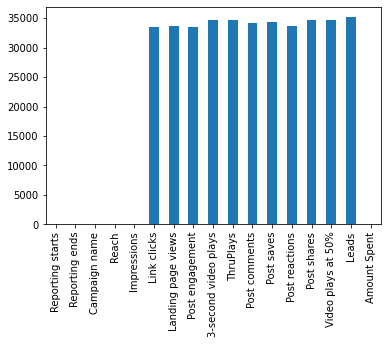

In [7]:
df10.isna().sum().plot(kind="bar")

Filling NA with 0

In [8]:
df10.fillna(0, inplace = True)

In [9]:
df10.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Reach                   1.768021e+09
Impressions             2.073379e+09
Link clicks             2.835494e+04
Landing page views      7.771209e+02
Post engagement         2.080676e+07
3-second video plays    2.163761e+07
ThruPlays               3.141147e+06
Post comments           1.682785e+01
Post saves              3.694782e+00
Post reactions          1.263943e+04
Post shares             1.489384e+01
Video plays at 50%      4.266853e+06
Leads                   1.079619e+01
Amount Spent            1.055184e+04
dtype: float64

no Full duplicates

In [10]:
df10.duplicated().sum()

0

creating column with Campaign objectives

In [11]:
desc = {"_CPE_":"CPE","_CPLPV_": "CPLPV","_CPC_":"CPC","_CPMR_":"CPMR","_CPV_":"CPV","_CPM_":"CPM","_CPL_":"CPL","_CPA_":"CPA","_Remarketing_":"Remarkerting"}

def check_desc(x):
    for key in desc:
        if key.lower() in x.lower():
            return desc[key]
    return ''

df10["Campaign_objective"] = df10["Campaign name"].map(lambda x: check_desc(x))

creating columns with Countries

In [12]:
desc = {"_EGYPT_":"EGYPT","KSA":"KSA","_UAE_":"UAE","QATAR":"QATAR"}

def check_desc(x):
    for key in desc:
        if key.lower() in x.lower():
            return desc[key]
    return ''

df10["country"] = df10["Campaign name"].map(lambda x: check_desc(x))

Checking if all dates imply 0 day difference

In [13]:
print(df10['Reporting starts'].dtypes)
print(df10['Reporting ends'].dtypes)

object
object


In [14]:
df10['Reporting starts']=pd.to_datetime(df10['Reporting starts'])
df10['Reporting ends']=pd.to_datetime(df10['Reporting ends'])

In [15]:
df10['Difference'] = (df10['Reporting starts'] - df10['Reporting ends']).dt.days

In [16]:
df10[df10.Difference != 0].shape[0]

0

Renaming Columns

In [17]:
df10.rename(columns={'Campaign name':'Campaign_name','Link clicks':'Link_clicks','Landing page views':'Landing_page_views','Post engagement':'Post_engagement','3-second video plays':'Three_second_video_plays','Post comments':'Post_comments','Post saves':'Post_saves','Post reactions':'Post_reactions','Post shares':'Post_shares','Video plays at 50%':'Video_plays_at50_percent','Amount Spent':'Amount_Spent'}, inplace = True)

Dropping columns not factored in ML

In [18]:
df10.drop(columns=['Reporting starts','Reporting ends','Campaign_name'], axis=1, inplace = True)

In [19]:
df10.drop(columns=['Difference'], axis=1, inplace= True)

Splitting the data

In [20]:
from sklearn.model_selection import train_test_split
train_val_set, test_set = train_test_split(df10, test_size=0.2, random_state=111, shuffle = True)

In [21]:
train_set, val_set = train_test_split(train_val_set, test_size=0.2, random_state=111, shuffle = True)

In [22]:
print("Length of training data:", len(train_set))
print("Length of Validation data:", len(val_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(df10))

Length of training data: 22892
Length of Validation data: 5724
Length of testing data: 7154
Length of total data: 35770


aassigning dependent and independent variables

In [23]:
y_train = train_set['Amount_Spent']
X_train = train_set.drop(['Amount_Spent'], axis=1)

y_valid = val_set['Amount_Spent']
X_valid = val_set.drop(['Amount_Spent'], axis=1)

y_test = test_set['Amount_Spent']
X_test = test_set.drop(['Amount_Spent'], axis=1)

Encoding Cat variables

In [24]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_valid = pd.get_dummies(X_valid,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)

Scaling the data

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X_train_S = scaler.fit_transform(X_train)
X_valid_S = scaler.fit_transform(X_valid)
X_test_S = scaler.fit_transform(X_test)

Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_S, y_train)

from sklearn.metrics import mean_squared_error

y_predictions = lin_reg.predict(X_valid_S)
lin_mse = mean_squared_error(y_valid, y_predictions)
lin_rmse = np.sqrt(lin_mse)
print(" The linear regression model resulted in: ", lin_rmse)

 The linear regression model resulted in:  72.32416027557117


In [29]:
from sklearn.metrics import r2_score

In [30]:
LR_r2_score = r2_score(y_valid,y_predictions)
print(" The R2 Score of Linear Regression: ", LR_r2_score)

 The R2 Score of Linear Regression:  0.36124316302860604


Decision Trees

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_S, y_train)

DecisionTreeRegressor()

In [32]:
y_predictions = tree_reg.predict(X_valid_S)
tree_mse = mean_squared_error(y_valid, y_predictions)
tree_rmse = np.sqrt(tree_mse)
print(" The decision tree model resulted in: ", tree_rmse)

 The decision tree model resulted in:  28.282649866227626


In [33]:
dt_r2_score = r2_score(y_valid,y_predictions)
print(" The R2 Score of the Decision Tree Model: ", dt_r2_score)

 The R2 Score of the Decision Tree Model:  0.9023192566504834


Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_S, y_train)

RandomForestRegressor()

In [35]:
y_predictions = forest_reg.predict(X_valid_S)
forest_mse = mean_squared_error(y_valid, y_predictions)
forest_rmse = np.sqrt(forest_mse)
print(" The decision Random Forest model resulted in: ", forest_rmse)

 The decision Random Forest model resulted in:  27.14058321845091


In [36]:
rf_r2_score = r2_score(y_valid,y_predictions)
print(" The R2 Score of Random Forest Regressor: ", rf_r2_score)

 The R2 Score of Random Forest Regressor:  0.9100487684971896


KNN

In [37]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV

In [38]:
rmse_val = [ ]
k_range = range(1, 30)
for K in k_range:
  model= neighbors.KNeighborsRegressor(n_neighbors=K)
  model.fit(X_train_S,y_train)
  pred1 = model.predict(X_valid_S)
  error = sqrt(mean_squared_error(y_valid,pred1))
  rmse_val.append(error)
  print("RMSE value for k=", K, 'is:', error)

RMSE value for k= 1 is: 27.39649639479459
RMSE value for k= 2 is: 33.452960534109394
RMSE value for k= 3 is: 33.66863837801926
RMSE value for k= 4 is: 34.0527004586829
RMSE value for k= 5 is: 34.92734212188942
RMSE value for k= 6 is: 36.25533358703866
RMSE value for k= 7 is: 38.42532446601035
RMSE value for k= 8 is: 39.79662952838577
RMSE value for k= 9 is: 41.98425537351101
RMSE value for k= 10 is: 43.4005341513114
RMSE value for k= 11 is: 44.78904871261761
RMSE value for k= 12 is: 44.09132672423089
RMSE value for k= 13 is: 44.143610627171554
RMSE value for k= 14 is: 45.571339113714586
RMSE value for k= 15 is: 46.851163318383186
RMSE value for k= 16 is: 47.019857453694556
RMSE value for k= 17 is: 47.38451502053932
RMSE value for k= 18 is: 48.67214787987953
RMSE value for k= 19 is: 49.66527078388558
RMSE value for k= 20 is: 50.27992381487008
RMSE value for k= 21 is: 51.04470678474102
RMSE value for k= 22 is: 51.84895306725306
RMSE value for k= 23 is: 52.44981736079262
RMSE value for k=

Text(0, 0.5, 'RMSE Score')

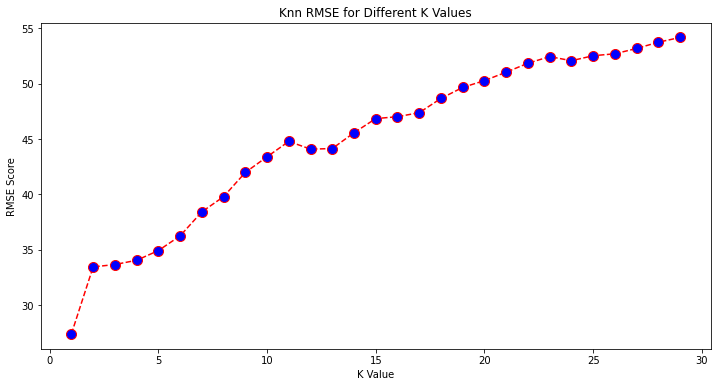

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(k_range, rmse_val, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Knn RMSE for Different K Values')
plt.xlabel('K Value')
plt.ylabel('RMSE Score')

In [40]:


rmse_val = np.array(rmse_val)
best_rmse_score = rmse_val[rmse_val.argmin()]
best_k = k_range[rmse_val.argmin()]

print(f'Best K={best_k} achieved a RMSE = {best_rmse_score :.4f}')

Best K=1 achieved a RMSE = 27.3965


optimizing the lowest RMSE model

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 5, 10], 'max_features': [2,3,4,8]},          
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_S, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 8],
                          'n_estimators': [3, 5, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [42]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 10}

In [43]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=10)

In [44]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test_S)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

34.82915193027037

In [45]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([25.45452356, 42.16879034])